In [4]:
what_were_covering = ["Data collection", "Data exploration",
"Data preprocessing",
"Model development",
"Model validation",
"Model Evaluation",
"Improve a model",
"Save and load a trained model"
]

### Data collection
#### Data was collected from previous research work https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

## 1.0 Data Processing

### 1.1 Data Exploration

In [5]:
# Setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Import data 
compressive_strength = pd.read_csv("data/Concrete_Data_Yeh.csv")
compressive_strength.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### NB: all the features data in kg/m^3 except Age which is day


In [7]:
# Rename the columns 
new_name_for_columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

compressive_strength.columns = new_name_for_columns

In [8]:
# Description about the data
compressive_strength.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
sns.displot(data=compressive_strength, kind="kde", legend=True, height=10,  fill=True, palette=sns.color_palette('bright')[:9])

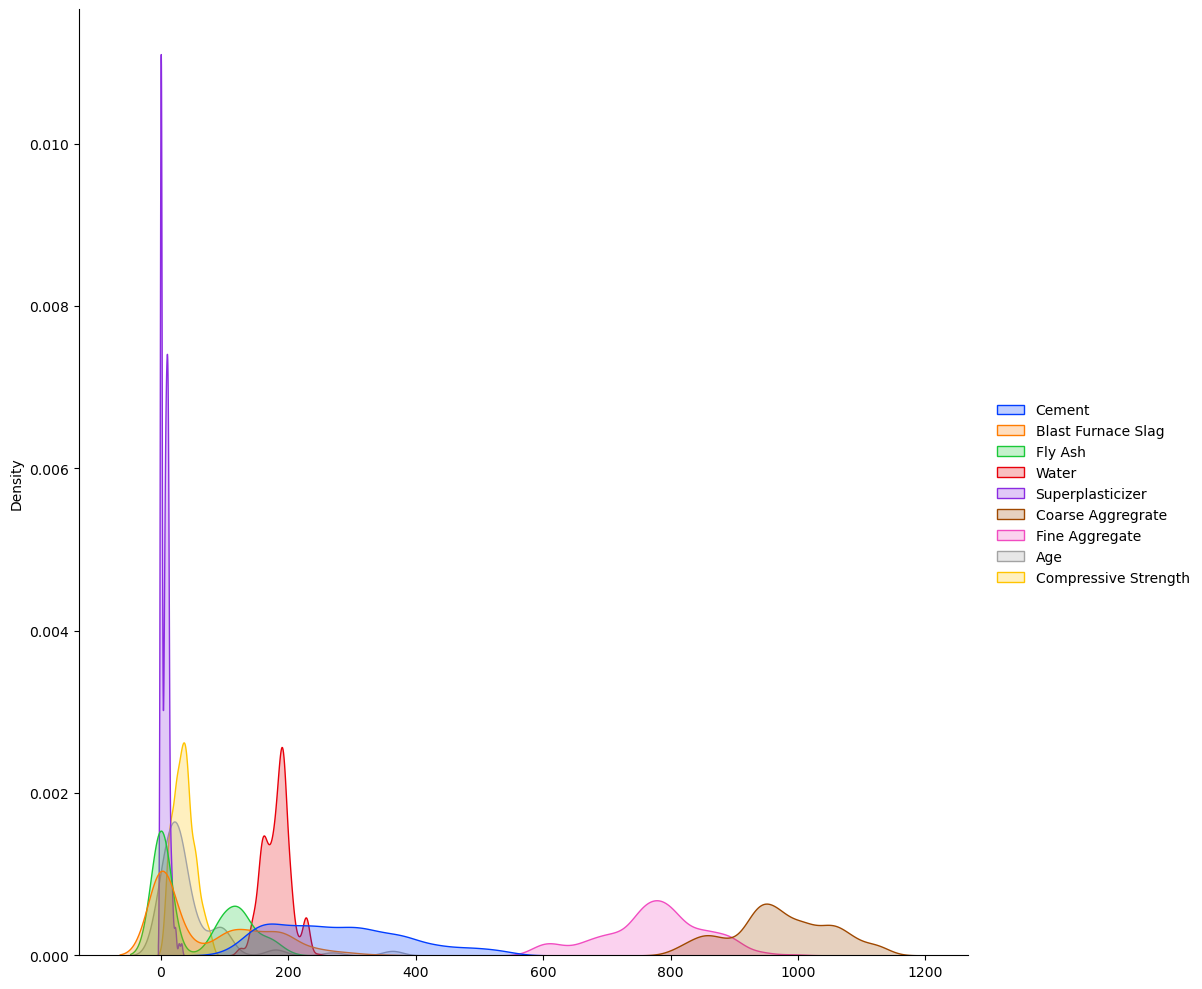

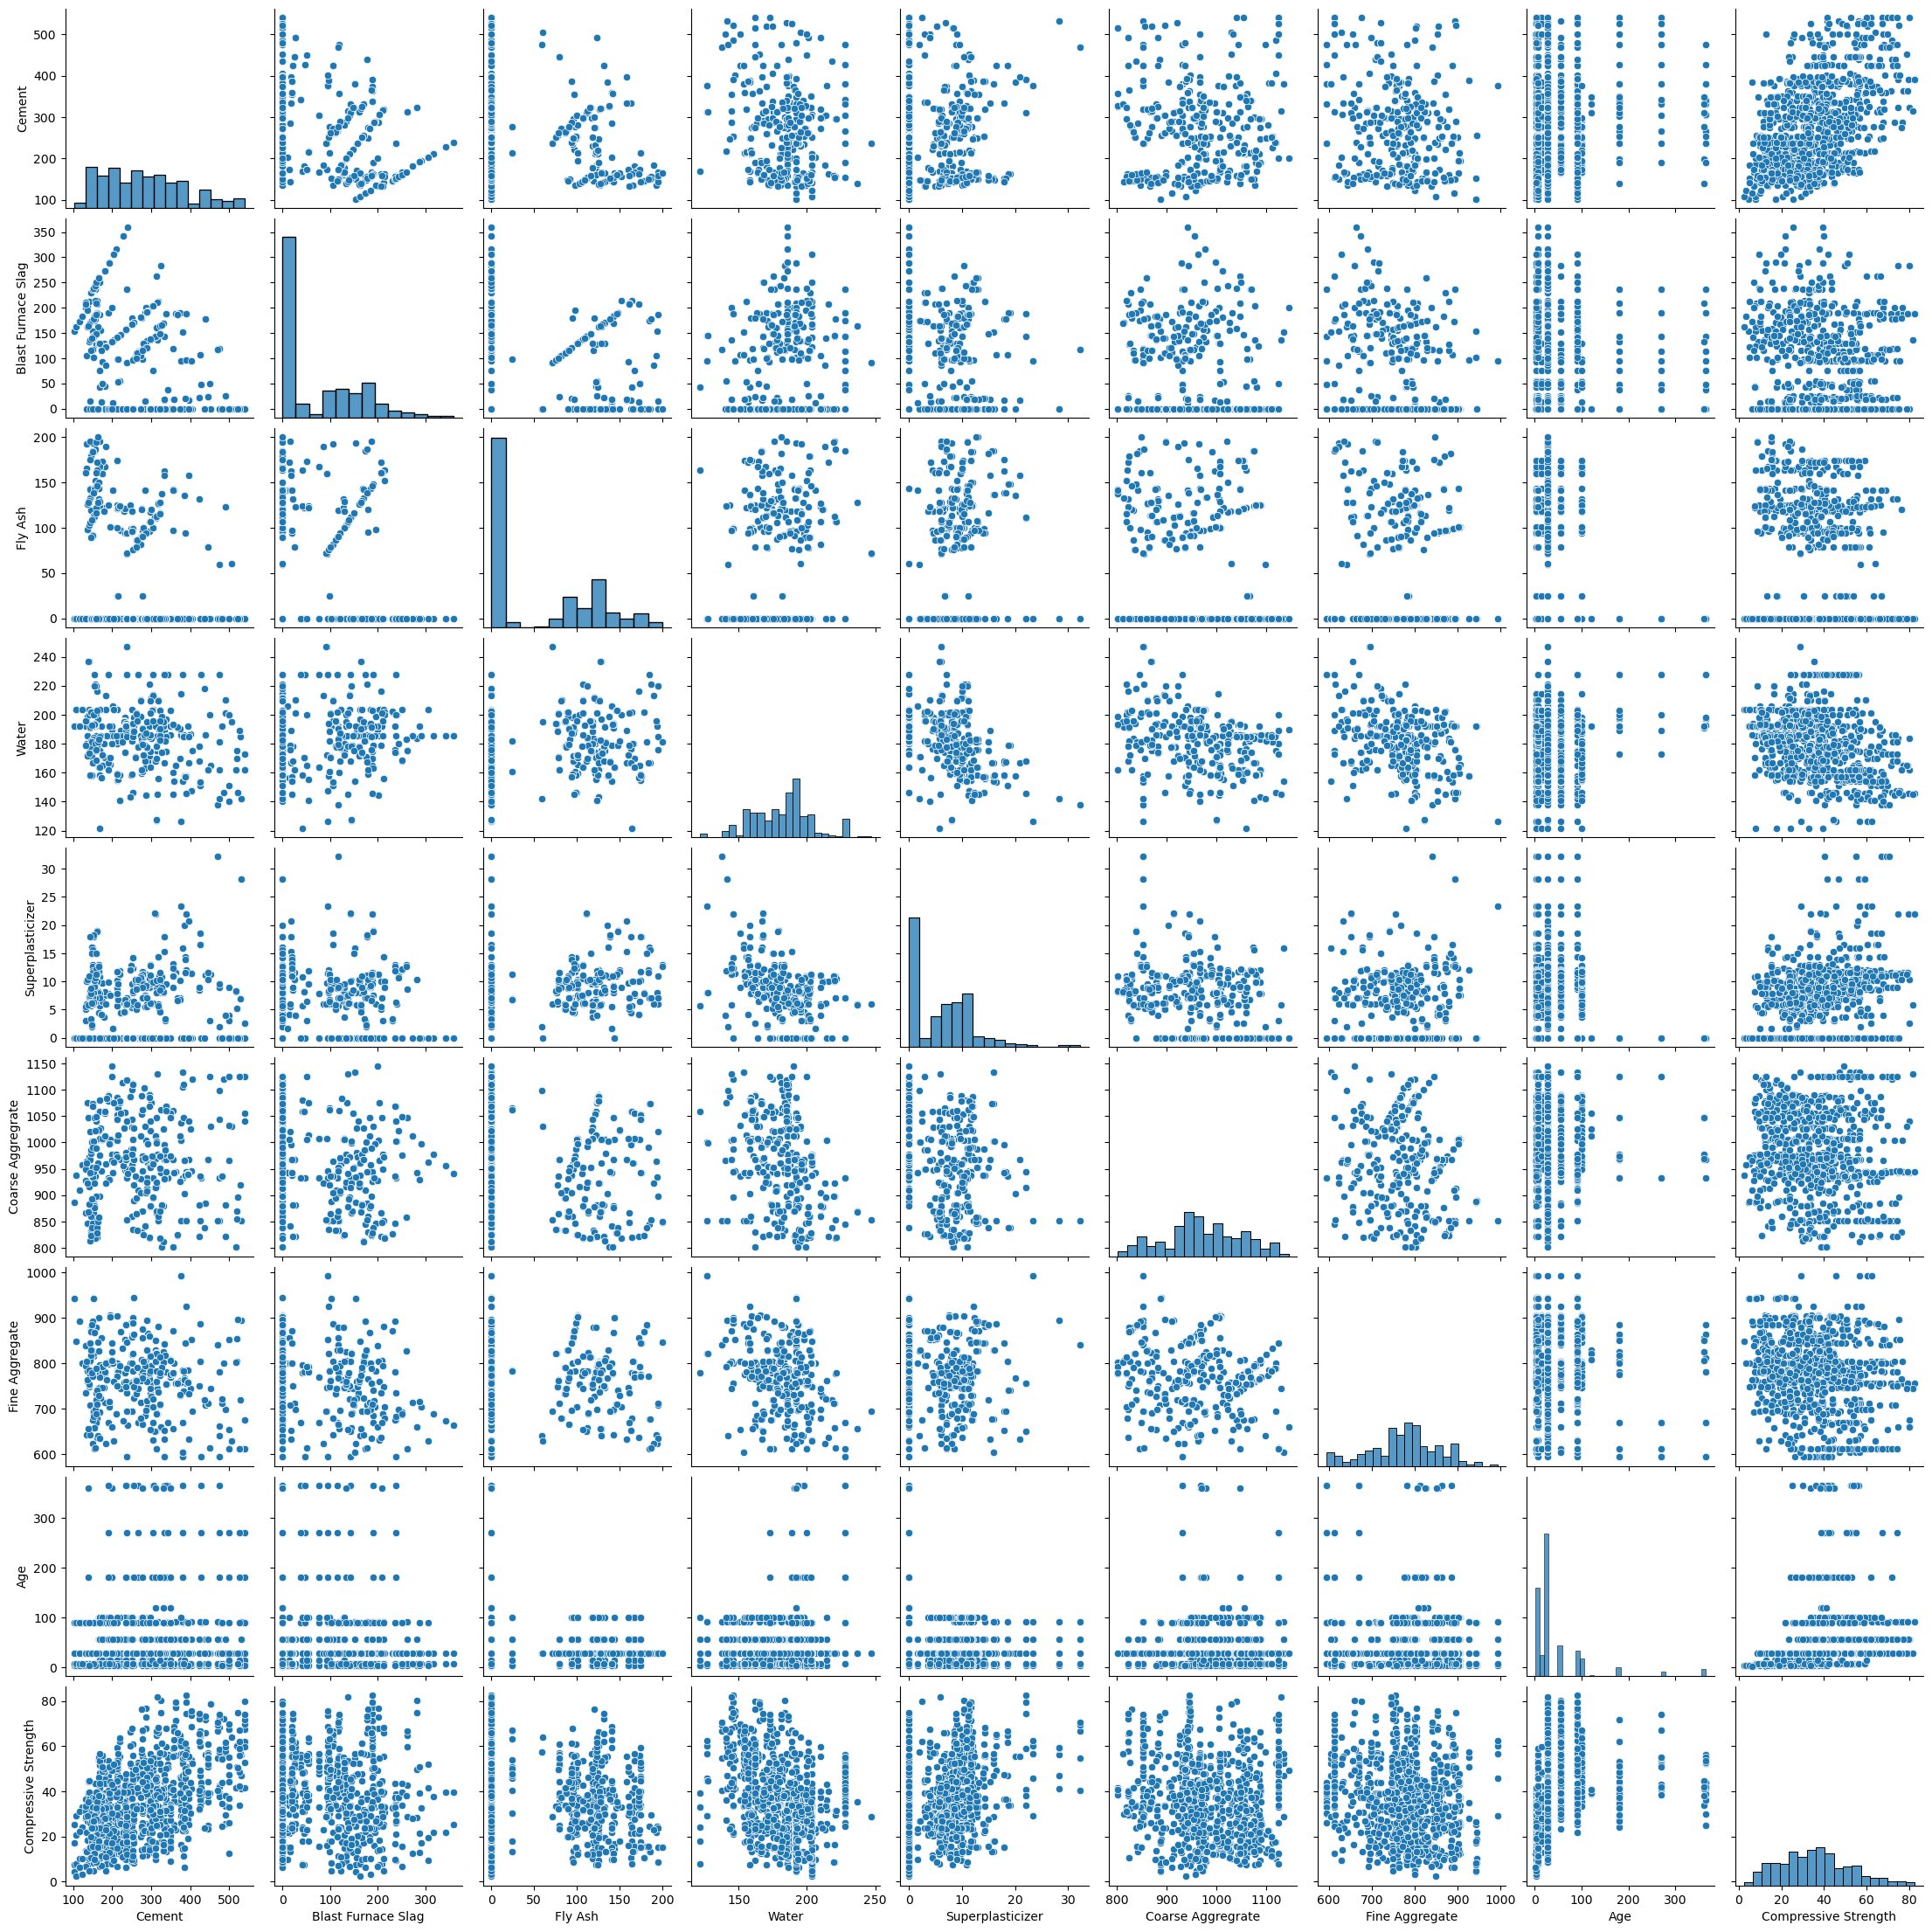

In [10]:
# Show correlation between the features

sns.pairplot(compressive_strength)
plt.show()



### Let determine Pearson correlation coefficient to get the numerical value of the coefficient

In [11]:
corr = compressive_strength.corr()
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age,Compressive Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregrate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Compressive Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


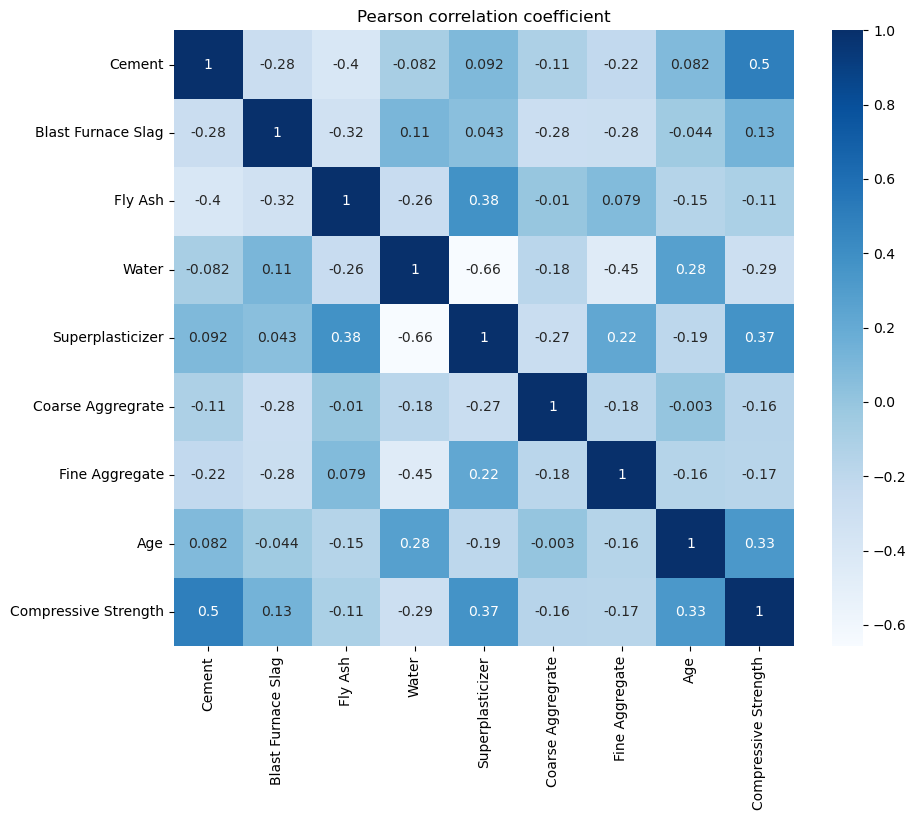

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Pearson correlation coefficient")
plt.show()

In [17]:
corr_sorted = corr.unstack().sort_values(kind="quicksort", ascending=False)

print(corr_sorted[corr_sorted != 1]).head(2)
print(corr_sorted[corr_sorted != 1]).tail(10)

Compressive Strength  Cement                  0.497832
Cement                Compressive Strength    0.497832
Fly Ash               Superplasticizer        0.377503
Superplasticizer      Fly Ash                 0.377503
Compressive Strength  Superplasticizer        0.366079
                                                ...   
Fly Ash               Cement                 -0.397467
Fine Aggregate        Water                  -0.450661
Water                 Fine Aggregate         -0.450661
Superplasticizer      Water                  -0.657533
Water                 Superplasticizer       -0.657533
Length: 72, dtype: float64


AttributeError: 'NoneType' object has no attribute 'head'

### 1.2 Data preprocessing

In [18]:
# Renaming our Compressive Strength columns to target
compressive_strength["target"] = compressive_strength["Compressive Strength"]
compressive_strength = compressive_strength.drop("Compressive Strength", axis=1)
compressive_strength.head()

# Checking if there is missing data
compressive_strength.isnull().sum()



Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregrate     0
Fine Aggregate        0
Age                   0
target                0
dtype: int64

### 1.21 Split the data to train and test set

In [19]:
from sklearn.model_selection import train_test_split

# Setup randowm seed
np.random.seed(42)

# Create features variables X & y
X = compressive_strength.drop("target", axis=1)
y = compressive_strength["target"]



# Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Data before scaling")
X_train.head()

Data before scaling


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


### 1.21 Feature Scaling
Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0.



In [20]:
from sklearn.preprocessing import StandardScaler

# instantiate the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data after scaling")
print(X_train)

Data after scaling
[[-1.16087734  0.85738747  0.9824489  ... -0.25746155 -0.64752011
  -0.27567315]
 [ 1.30862304 -0.60249189  1.23259821 ... -1.92694961 -0.2731482
  -0.27567315]
 [-0.0768653  -0.85558366  1.06687429 ...  1.01785948  0.06662828
  -0.68931339]
 ...
 [-0.86591441 -0.85558366  1.12628475 ...  1.34082214  0.33103616
   0.91561074]
 [ 1.78316909  0.51111191 -0.83113361 ... -1.54422615  0.11605031
  -0.27567315]
 [ 0.28509237 -0.85558366  0.9355459  ... -0.6172979   0.13458358
  -0.27567315]]


## 2.0 Model development (Modeling)


### 2.1 **Linear Regression**
Linear regression predicts a continuous output by fitting a straight line to the data.

- **Equation**:  
  $$
  y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon
  $$
  Where:
  - Predicted value
      $$(y)$$
  - Input features
    $$(x_i)$$
  - Coefficients (weights
    $$(\beta_i)$$
  - Error term
    $$(\epsilon)$$

- **How It Works**:  
  It minimizes the Mean Squared Error (MSE) to find the optimal weights:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$




In [21]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
# instantiate the LineaLinearRegression
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

# Predicts using the test data set 
lr_y_preds = lr.predict(X_test)

lr.score(X_test, y_test)

0.627553179231485

### 2.2 **Decision Trees**
Decision trees split the data into branches based on feature values to predict the output.

- **Splitting Criterion**:  
  It uses metrics like **Gini Index** or **Entropy** for classification or **Mean Squared Error** for regression.

- **Entropy for Classification**:  
  $$
  \text{Entropy} = -\sum_{i=1}^{k} p_i \log_2(p_i)
  $$
  Where \(p_i\) is the probability of class \(i\).

- **Regression Split**:  
  Minimize variance in child nodes:
  $$
  \text{Variance} = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2
  $$

- **How It Works**:  
  At each step, the tree selects the feature and threshold that best split the data to improve purity or reduce error.



In [22]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
# instantiate DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fit the model 
dt.fit(X_train, y_train)

# predict dt_y_predicts
dt_y_predicts = dt.predict(X_test)

dt.score(X_test, y_test)

0.8332660971484926

### 3. **Random Forest**
Random Forest builds multiple decision trees and averages their predictions for better accuracy and reduced overfitting.

- **How It Works**:
  - Trains multiple decision trees on random subsets of the data and features (bagging).
  - For classification: uses majority voting across trees.
  - For regression: uses the average of predictions.

- **Mathematical Representation**:  
  Prediction is the average (regression) or majority vote (classification):
  $$
  \hat{y} = \frac{1}{T} \sum_{t=1}^T f_t(x)
  $$
  Where \(f_t(x)\) is the prediction from the \(t\)-th tree.


In [27]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
# instantiate the RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf_y_predicts = rf.predict(X_test)

# validate the model
rf.score(X_test, y_test)


0.8819618284377747

### 4. **Support Vector Machines (SVM)**
SVMs find the hyperplane that best separates data into classes with the largest margin.

- **Objective**:  
  Maximize the margin between the two classes:
  $$
  \text{Margin} = \frac{2}{\|\mathbf{w}\|}
  $$
  Subject to:
  $$
  y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
  $$
  Where:
  - \($$mathbf{w}\): Weight vector
  - \(b\): Bias
  - \(y_i\): Class label (\(+1\) or \(-1\))

- **Kernel Trick**:  
  For non-linear data, map input data to a higher-dimensional space:
  $$
  K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
  $$

- **How It Works**:  
  Solves a constrained optimization problem to find the optimal hyperplane.


In [32]:
from sklearn.svm import SVR

np.random.seed(42)
# instantiate the model
sv = SVR()

# the model 
sv.fit(X_train, y_train)

# predicts sv_y_predicts
sv_y_predicts = sv.predict(X_test)

# validate 
sv.score(X_test, y_test)

0.6547637106078593